In [494]:
from __future__ import division
from __future__ import print_function
import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn import cross_validation
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline


from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *

import re
from HTMLParser import HTMLParser
import datetime
import cPickle as pickle

In [2]:
# File with gender included
sample10_file = '/Users/lekha/galvanize/capstone/projectRiley/data/sample10/out.txt'
sample1000_file = '/Users/lekha/galvanize/capstone/projectRiley/data/cleandatagender1000.txt'
all_file = '/Users/lekha/galvanize/capstone/projectRiley/data/cleandatagenderall.txt'

In [189]:
df_all = pd.read_csv(all_file, sep="|")

In [191]:
df_all.head()

,Unnamed: 0,full_name,html,summary,counter,first_name,gender
0,1,shawn douglas,./00006.html\n,i am interested in inventing new methods to co...,1,shawn,male
1,2,regina nunn,./05111108.html\n,missing,1,regina,female
2,3,michael mayes,./120394.html\n,a detail and results oriented professional wit...,1,michael,male
3,5,jason obrien,./17obrien.html\n,accomplished energetic sales professional with...,1,jason,male
4,6,kevin kim,./1800sushi.html\n,1800sushicom is the new online platform for or...,1,kevin,male


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 0 to 994
Data columns (total 9 columns):
full_name       995 non-null object
html            995 non-null object
summary         995 non-null object
first_name      995 non-null object
gender          995 non-null object
counter         995 non-null float64
summ_missing    995 non-null int64
summ_words      995 non-null int64
y               995 non-null int64
dtypes: float64(1), int64(3), object(5)
memory usage: 77.7+ KB


In [194]:
df_all = df_all[['full_name', 'html','summary', 'first_name', 'gender', 'counter']]

In [195]:
df_all['class'] = np.ones(len(df_all))

In [196]:
df_all['class'] = df_all['gender'].apply(lambda x: 0 if x == 'female' else 1)

In [197]:
df_all.head(20)

,full_name,html,summary,first_name,gender,counter,class
0,shawn douglas,./00006.html\n,i am interested in inventing new methods to co...,shawn,male,1,1
1,regina nunn,./05111108.html\n,missing,regina,female,1,0
2,michael mayes,./120394.html\n,a detail and results oriented professional wit...,michael,male,1,1
3,jason obrien,./17obrien.html\n,accomplished energetic sales professional with...,jason,male,1,1
4,kevin kim,./1800sushi.html\n,1800sushicom is the new online platform for or...,kevin,male,1,1
5,amy chu,./1amychu.html\n,missing,amy,female,1,0
6,betty evans,./1bettyevans.html\n,rj evans associates inc a retained executive ...,betty,female,1,0
7,jason cheng,./1jasoncheng.html\n,studied economics business administration and ...,jason,male,1,1
8,jonathan nelson,./1jonnelson.html\n,i make tools mostly software lowfriction highv...,jonathan,male,1,1
9,kelly sullivan,./1kellysullivan.html\n,missing,kelly,female,1,0


In [199]:
def f(x):
    if x == 'missing':
        return 1
    else:
        return 0

# Add feature for missing summary
df_all['summ_missing'] = df_all['summary'].apply(lambda x: f(x))

In [200]:
df_all.head()

,full_name,html,summary,first_name,gender,counter,class,summ_missing
0,shawn douglas,./00006.html\n,i am interested in inventing new methods to co...,shawn,male,1,1,0
1,regina nunn,./05111108.html\n,missing,regina,female,1,0,1
2,michael mayes,./120394.html\n,a detail and results oriented professional wit...,michael,male,1,1,0
3,jason obrien,./17obrien.html\n,accomplished energetic sales professional with...,jason,male,1,1,0
4,kevin kim,./1800sushi.html\n,1800sushicom is the new online platform for or...,kevin,male,1,1,0


In [205]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18047 entries, 0 to 18046
Data columns (total 8 columns):
full_name       18047 non-null object
html            18047 non-null object
summary         18040 non-null object
first_name      18043 non-null object
gender          18047 non-null object
counter         18047 non-null float64
class           18047 non-null int64
summ_missing    18047 non-null int64
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [203]:
# add feature for num of words in the summary
def lenx(mystr):
    return len(mystr.split())

In [209]:
df_all['summ_words'] = df_all['summary'].apply(lambda x: lenx(str(x)))

In [210]:
df_all.head()

,full_name,html,summary,first_name,gender,counter,class,summ_missing,summ_words
0,shawn douglas,./00006.html\n,i am interested in inventing new methods to co...,shawn,male,1,1,0,25
1,regina nunn,./05111108.html\n,missing,regina,female,1,0,1,1
2,michael mayes,./120394.html\n,a detail and results oriented professional wit...,michael,male,1,1,0,76
3,jason obrien,./17obrien.html\n,accomplished energetic sales professional with...,jason,male,1,1,0,55
4,kevin kim,./1800sushi.html\n,1800sushicom is the new online platform for or...,kevin,male,1,1,0,173


In [212]:
df_all.gender.value_counts()

male      11071
female     6976
Name: gender, dtype: int64

In [213]:
df_all.summ_missing.value_counts()

0    12185
1     5862
Name: summ_missing, dtype: int64

In [214]:
# create dfs for females and males
# subset the data by taking the most common names that can be more or less guaranteed to be the gender they claim to be
# high level analysis on the number of words used by males and females
females = df_all[df_all['gender'] == 'female']
males = df_all[df_all['gender'] == 'male']

In [216]:
df_all.groupby('gender').agg({'summ_words':np.mean})

,summ_words
gender,
female,66.402236
male,76.896125


In [217]:
df_all.groupby('gender').agg({'summ_missing':sum})

,summ_missing
gender,
female,2511
male,3351


In [218]:
# percentage summary missing
female_summaries = 2511/6976.
female_summaries

0.3599483944954128

In [219]:
male_summaries = 3351/11071
male_summaries

0.30268268449101254

In [220]:
# unique names in females and males
print females['first_name'].nunique()
print males['first_name'].nunique()


1851
2393


In [221]:
summary_df2 = df_all[df_all['summ_missing'] == 0]

In [222]:
type(summary_df2)

pandas.core.frame.DataFrame

In [223]:
summary_df2.head()

,full_name,html,summary,first_name,gender,counter,class,summ_missing,summ_words
0,shawn douglas,./00006.html\n,i am interested in inventing new methods to co...,shawn,male,1,1,0,25
2,michael mayes,./120394.html\n,a detail and results oriented professional wit...,michael,male,1,1,0,76
3,jason obrien,./17obrien.html\n,accomplished energetic sales professional with...,jason,male,1,1,0,55
4,kevin kim,./1800sushi.html\n,1800sushicom is the new online platform for or...,kevin,male,1,1,0,173
6,betty evans,./1bettyevans.html\n,rj evans associates inc a retained executive ...,betty,female,1,0,0,101


In [224]:
summary_df2.gender.value_counts()

male      7720
female    4465
Name: gender, dtype: int64

In [225]:
def get_vocab(my_str):
    words = my_str.split()
    words = [w for w in words if not w in stopwords]
    return words


In [228]:
vocab = summary_df2['summary'].apply(lambda x:get_vocab(str(x)))

In [229]:
all_vocab = []
for row in vocab:
    for word in row:
        all_vocab.append(word)



In [230]:
vocab_set = set(all_vocab)

In [231]:
len(vocab_set)

76964

In [232]:
summary_df2.gender.value_counts()

male      7720
female    4465
Name: gender, dtype: int64

In [ ]:
# a basic vocabulary look at males and females

In [235]:
f_vocab = females['summary'].apply(lambda x:get_vocab(str(x)))

In [236]:
f_all_vocab = []
for row in f_vocab:
    for word in row:
        f_all_vocab.append(word)
        
f_vocab_set = set(f_all_vocab)
len(f_vocab_set)

35370

In [238]:
m_vocab = males['summary'].apply(lambda x:get_vocab(str(x)))

In [239]:
m_all_vocab = []
for row in m_vocab:
    for word in row:
        m_all_vocab.append(word)
        
m_vocab_set = set(m_all_vocab)
len(m_vocab_set)

57951

In [240]:
def intersect(a, b):
    return list(set(a) & set(b))

In [241]:
common_words = intersect(f_vocab_set, m_vocab_set)

In [242]:
len(common_words)

16357

In [316]:
summary_df2['summary'] = summary_df2['summary'].astype(str)

/Users/lekha/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [243]:
# A basic prediction algorithm to predict gender using summary using RF

In [317]:
summary_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12185 entries, 0 to 18046
Data columns (total 9 columns):
full_name       12185 non-null object
html            12185 non-null object
summary         12185 non-null object
first_name      12182 non-null object
gender          12185 non-null object
counter         12185 non-null float64
class           12185 non-null int64
summ_missing    12185 non-null int64
summ_words      12185 non-null int64
dtypes: float64(1), int64(3), object(5)
memory usage: 952.0+ KB


In [649]:
from nltk import word_tokenize          
import pdb
stemmer = SnowballStemmer("english")
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize1(text):
    tokens = word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

def imputor(text):
    res = []
    for w in text.split():
        try:
            res.append(nn[w])
        except:
            res.append(w)
    return ' '.join(res)

def tokenize(text):
    #pdb.set_trace()
    tokens = word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    tstem = ' '.join(stems)
    return imputor(tstem)

    

In [513]:
summary_df2['stemmed'] = summary_df2['summary'].apply(lambda x: stem_summary(x))

/Users/lekha/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [650]:
t = summary_df2['summary'].iloc[0:1000]

In [653]:
toks = [tokenize(x) for x in t]

KeyboardInterrupt: 

In [514]:
summary_df2.head()

,full_name,html,summary,first_name,gender,counter,class,summ_missing,summ_words,stemmed
0,shawn douglas,./00006.html\n,i am interested in inventing new methods to co...,shawn,male,1,1,0,25,"[i, am, interest, in, invent, new, method, to,..."
2,michael mayes,./120394.html\n,a detail and results oriented professional wit...,michael,male,1,1,0,76,"[a, detail, and, result, orient, profession, w..."
3,jason obrien,./17obrien.html\n,accomplished energetic sales professional with...,jason,male,1,1,0,55,"[accomplish, energet, sale, profession, with, ..."
4,kevin kim,./1800sushi.html\n,1800sushicom is the new online platform for or...,kevin,male,1,1,0,173,"[1800sushicom, is, the, new, onlin, platform, ..."
6,betty evans,./1bettyevans.html\n,rj evans associates inc a retained executive ...,betty,female,1,0,0,101,"[rj, evan, associ, inc, a, retain, execut, sea..."


In [603]:

X_train, X_test, y_train, y_test = train_test_split(summary_df2['summary'], summary_df2['class'], test_size=0.3, random_state=0)

In [255]:
temp = np.array(y_test)

len(temp[(temp == 0)])

1341

In [604]:
stopwords =['10','100','1000','100000','11','12','13','14','15','150','16','17','18','19','1983','1986','1990','1991','1992','1993',
             '1994','1995','1996','1997','1998','1999','1st','20','200','2000','2001','2002','2003','2004','2005',
             '2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','21','22','23','24','25','250',
             '26','27','2d','2nd','30','300','35','360','365','3d','3rd','40','400','45','4th','50','500','5000',
             '60','70','75','80','90','ab','abc', 'an', 'the', 'and', 'of', 'in', 'to', 'for', 'with', 'my', 'as', 'on',
             'at', 'have', 'is', 'am', 'has', 'have', 'that', 'from', 'was', 'by', 'it', 'also', 'or', 'who', 'you', 'can',
             'their']

In [647]:
vect2 = CountVectorizer() 


In [648]:
X2 = vect2.fit_transform(toks)

<1000x32248 sparse matrix of type '<type 'numpy.int64'>'
	with 3203760 stored elements in Compressed Sparse Row format>

In [ ]:
print ("Creating the bag of words...\n")
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = tokenize1,    \
                             preprocessor = None, \
                             stop_words = stopwords,   \
                             max_features = 5000) 

In [657]:
tfidf = TfidfVectorizer(analyzer = 'word', tokenizer = tokenize1, stop_words = stopwords, max_features = 5000)

In [658]:
train_tfidf = tfidf.fit_transform(X_train)

In [659]:
train_tfidf = train_tfidf.toarray()
feature_names = tfidf.get_feature_names()

In [660]:
feature_names

[u'1',
 u'10000',
 u'120',
 u'125',
 u'1980',
 u'1980s',
 u'1984',
 u'1987',
 u'1988',
 u'1989',
 u'1990s',
 u'2',
 u'20000',
 u'20132014',
 u'20th',
 u'21st',
 u'28',
 u'29',
 u'3',
 u'31',
 u'32',
 u'33',
 u'34',
 u'350',
 u'36',
 u'38',
 u'39',
 u'3m',
 u'4',
 u'4000',
 u'401k',
 u'5',
 u'501c3',
 u'55',
 u'5th',
 u'6',
 u'600',
 u'65',
 u'66',
 u'7',
 u'700',
 u'8',
 u'800',
 u'9',
 u'95',
 u'98',
 u'99',
 u'a',
 u'aa',
 u'aaa',
 u'aaron',
 u'abil',
 u'abl',
 u'about',
 u'abov',
 u'abroad',
 u'absolut',
 u'absorb',
 u'abstract',
 u'abus',
 u'ac',
 u'academ',
 u'academi',
 u'academia',
 u'acceler',
 u'accent',
 u'accentur',
 u'accept',
 u'access',
 u'accid',
 u'acclaim',
 u'accolad',
 u'accommod',
 u'accompani',
 u'accomplish',
 u'accord',
 u'account',
 u'accredit',
 u'accumul',
 u'accur',
 u'accuraci',
 u'accustom',
 u'achiev',
 u'acid',
 u'acknowledg',
 u'acoust',
 u'acquir',
 u'acquisit',
 u'acr',
 u'acrobat',
 u'across',
 u'acryl',
 u'act',
 u'action',
 u'actionori',
 u'actionsc

In [655]:
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['10', '100', '1000', '100000', '11', '12', '13', '14', '15', '150', '16', '17', '18', '19', '1983', '1986', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '1st', '20', '200', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', ... 'am', 'has', 'have', 'that', 'from', 'was', 'by', 'it', 'also', 'or', 'who', 'you', 'can', 'their'],
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=<function tokenize at 0x11c820230>, vocabulary=None)

In [656]:
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(X_train)

KeyboardInterrupt: 

In [608]:
# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()
feature_names = vectorizer.get_feature_names()

In [610]:
feature_names

[u'1',
 u'10000',
 u'120',
 u'125',
 u'1980',
 u'1980s',
 u'1984',
 u'1987',
 u'1988',
 u'1989',
 u'1990s',
 u'2',
 u'20000',
 u'20132014',
 u'20th',
 u'21st',
 u'28',
 u'29',
 u'3',
 u'31',
 u'32',
 u'33',
 u'34',
 u'350',
 u'36',
 u'38',
 u'39',
 u'3m',
 u'4',
 u'4000',
 u'401k',
 u'5',
 u'501c3',
 u'55',
 u'5th',
 u'6',
 u'600',
 u'65',
 u'66',
 u'7',
 u'700',
 u'8',
 u'800',
 u'9',
 u'95',
 u'98',
 u'99',
 u'a',
 u'aa',
 u'aaa',
 u'aaron',
 u'abil',
 u'abl',
 u'about',
 u'abov',
 u'abroad',
 u'absolut',
 u'absorb',
 u'abstract',
 u'abus',
 u'ac',
 u'academ',
 u'academi',
 u'academia',
 u'acceler',
 u'accent',
 u'accentur',
 u'accept',
 u'access',
 u'accid',
 u'acclaim',
 u'accolad',
 u'accommod',
 u'accompani',
 u'accomplish',
 u'accord',
 u'account',
 u'accredit',
 u'accumul',
 u'accur',
 u'accuraci',
 u'accustom',
 u'achiev',
 u'acid',
 u'acknowledg',
 u'acoust',
 u'acquir',
 u'acquisit',
 u'acr',
 u'acrobat',
 u'across',
 u'acryl',
 u'act',
 u'action',
 u'actionori',
 u'actionsc

In [536]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
print (vocab)

[u'1', u'10000', u'120', u'125', u'1980', u'1980s', u'1984', u'1987', u'1988', u'1989', u'1990s', u'2', u'20000', u'20132014', u'20th', u'21st', u'28', u'29', u'3', u'31', u'32', u'33', u'34', u'350', u'36', u'38', u'39', u'3m', u'4', u'4000', u'401k', u'5', u'501c3', u'55', u'5th', u'6', u'600', u'65', u'66', u'7', u'700', u'8', u'800', u'9', u'95', u'98', u'99', u'a', u'aa', u'aaa', u'aaron', u'abil', u'abl', u'about', u'abov', u'abroad', u'absolut', u'absorb', u'abstract', u'abus', u'ac', u'academ', u'academi', u'academia', u'acceler', u'accent', u'accentur', u'accept', u'access', u'accid', u'acclaim', u'accolad', u'accommod', u'accompani', u'accomplish', u'accord', u'account', u'accredit', u'accumul', u'accur', u'accuraci', u'accustom', u'achiev', u'acid', u'acknowledg', u'acoust', u'acquir', u'acquisit', u'acr', u'acrobat', u'across', u'acryl', u'act', u'action', u'actionori', u'actionscript', u'activ', u'activist', u'actor', u'actual', u'acumen', u'acut', u'ad', u'ada', u'adam', 

In [661]:
print ("Training the random forest...")

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
#forest = forest.fit(train_data_features, y_train)

forest = forest.fit(train_tfidf, y_train)

Training the random forest...


In [662]:
# Testing

# Get a bag of words for the test set, and convert to a numpy array
#test_data_features = vectorizer.transform(X_test)
test_data_features = tfidf.transform(X_test)
test_data_features = test_data_features.toarray()

# Use the random forest to make sentiment label predictions
yhat = forest.predict(test_data_features)

probX = forest.predict_proba(test_data_features)


In [540]:
probX[:10,:]


array([[ 0.35      ,  0.65      ],
       [ 0.2       ,  0.8       ],
       [ 0.33      ,  0.67      ],
       [ 0.39      ,  0.61      ],
       [ 0.48416667,  0.51583333],
       [ 0.57      ,  0.43      ],
       [ 0.26      ,  0.74      ],
       [ 0.29      ,  0.71      ],
       [ 0.49      ,  0.51      ],
       [ 0.36      ,  0.64      ]])

In [663]:
zip(yhat, y_test)
print (probX)

[[ 0.41  0.59]
 [ 0.28  0.72]
 [ 0.32  0.68]
 ..., 
 [ 0.71  0.29]
 [ 0.42  0.58]
 [ 0.22  0.78]]


In [277]:
yhat

array([1, 1, 1, ..., 0, 1, 1])

In [664]:
acc = forest.score(test_data_features, y_test)

In [665]:
acc

0.6687636761487965

In [264]:
zip(yhat, y_test)

[(1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (0, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 0),
 (1, 1),
 (0, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (0, 1),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (0, 1),
 (1, 0),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 

In [666]:
print ("Precision Score: {0}".format(precision_score(y_test, yhat)))
print ("Recall Score: {0}".format(recall_score(y_test, yhat)))
print ("AUC Score: {0}".format(roc_auc_score(y_test, yhat)))
print ("Model Score:{0}".format(forest.score(test_data_features, y_test)))

Precision Score: 0.682781456954
Recall Score: 0.890712742981
AUC Score: 0.588160249193
Model Score:0.668763676149


In [294]:
fpr, tpr, thresholds = roc_curve(y_test, probX[:,1])

In [547]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, probX[:,1])

In [667]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, probX[:,1])

In [273]:
yhat

array([1, 1, 1, ..., 0, 1, 1])

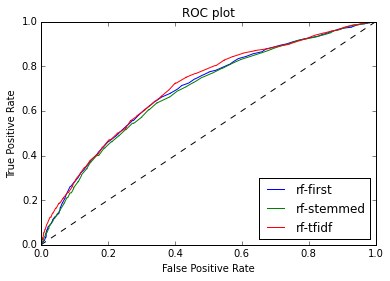

In [668]:
# ROC Curve
plt.plot(np.array(range(101))/100, np.array(range(101))/100, '--', color='black')
plt.plot(fpr, tpr, label='rf-first')
plt.plot(fpr1, tpr1, label='rf-stemmed')
plt.plot(fpr2, tpr2, label='rf-tfidf')
plt.ylabel("True Positive Rate ")
plt.xlabel("False Positive Rate")
plt.title("ROC plot")
plt.legend(loc='lower right')
plt.show()



# Topic Modeling with 5000 features: NMF

### 1. All profiles

In [350]:
females = summary_df2[summary_df2['gender'] == 'female']
males = summary_df2[summary_df2['gender'] == 'male']

In [355]:
X = summary_df2['summary']
y = np.array(summary_df2['class'])

In [669]:
print ("Using the bag of words to create features...\n")
# #vectorizer = CountVectorizer(analyzer = "word",   \
#                              tokenizer = tokenize,    \
#                              preprocessor = None, \
#                              stop_words = stopwords,   \
#                              max_features = 5000) 

vectorizer = TfidfVectorizer(analyzer = 'word', tokenizer = tokenize1, stop_words = stopwords, max_features = 5000)

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
word_frequencies = vectorizer.fit_transform(X)

# Numpy arrays are easy to work with, so convert the result to an 
# array
word_frequencies = word_frequencies.toarray()
feature_names = vectorizer.get_feature_names()

Using the bag of words to create features...



In [413]:
nmf_model = NMF(n_components=10, init='random', random_state=0)
W = nmf_model.fit_transform(word_frequencies)
# H: Topics * Words
H = nmf_model.components_
print (H.shape, W.shape)

(10, 5000) (12185, 10)


In [414]:
# Print the top 20 words and weights for each topic
def print_top_weights(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(H):
        print("Topic #%d:" % topic_idx)
        top_weights = topic.argsort()[:-n_top_words - 1:-1]
        #print (top_weights)
        print (" ".join(["{0}, {1}".format(feature_names[x], topic[x]) for x in top_weights]))
    print()

In [408]:
print_top_weights(nmf_model, feature_names, 20)

Topic #0:
management, 21.1778247711 experience, 17.2935547396 development, 14.8567737168 business, 14.4690076608 he, 12.6794470713 university, 12.6042050661 years, 12.2404891359 work, 10.6760922423 working, 10.4272041311 research, 9.99849893943 education, 9.27567966114 skills, 9.13174398611 washington, 9.07383626314 design, 8.34876151777 professional, 8.01043149587 planning, 7.94906094573 program, 7.82144233304 health, 7.79534670734 his, 7.62349119473 public, 7.56798113659
Topic #1:
management, 23.4933913719 experience, 16.7050075179 development, 16.3882079238 business, 13.5672662265 years, 9.69976582907 skills, 9.25273982906 health, 8.81655902635 marketing, 8.32220036532 university, 8.20128878269 research, 8.06776987818 team, 8.06508957295 public, 8.00917129805 leadership, 7.98350886347 he, 7.83251821182 project, 7.76084739001 analysis, 7.72832585796 design, 7.53559746996 international, 7.23275395654 new, 7.18224389379 professional, 7.14609393502
Topic #2:
experience, 14.0314214398 ma

In [450]:
# Print the most probable topic for each document/profile
def document_topics(W):
    top_idx = np.zeros([W.shape[0],1], dtype=float)
    for row_idx, row in enumerate(W):
        topic_idx = row.argsort()[-1]  
        top_idx[row_idx] = topic_idx      
    return top_idx


In [425]:
g = np.zeros([10, 1])

In [427]:
g[1] =4

In [452]:
doc_topics = document_topics(W)


# Topic Modeling

In [670]:
#tokenize: function that is stemming using SnowballStemmer
#stopwords: custom stop words
def run_topic_model(X, stopwords):
    print ("Using the bag of words to create features...\n")
#     vectorizer = CountVectorizer(analyzer = "word",   \
#                                  tokenizer = tokenize,    \
#                                  preprocessor = None, \
#                                  stop_words = stopwords,   \
#                                  max_features = 5000) 

    vectorizer = TfidfVectorizer(analyzer = 'word', tokenizer = tokenize1, stop_words = stopwords, max_features = 5000)
    
    # fit_transform() does two functions: First, it fits the model
    # and learns the vocabulary; second, it transforms our training data
    # into feature vectors. The input to fit_transform should be a list of 
    # strings.
    word_frequencies = vectorizer.fit_transform(X)

    # Numpy arrays are easy to work with, so convert the result to an 
    # array
    word_frequencies = word_frequencies.toarray()
    feature_names = vectorizer.get_feature_names()

    # NMF Model to determine topics
    nmf_model = NMF(n_components=10, init='random', random_state=0)
    W = nmf_model.fit_transform(word_frequencies)
    # H: Topics * Words
    H = nmf_model.components_
    print (H.shape, W.shape)
    
    n_top_words = 20
    # Print weights and topics for the top 20 topics
    for topic_idx, topic in enumerate(H):
        print("Topic #%d:" % topic_idx)
        top_weights = topic.argsort()[:-n_top_words - 1:-1]
        print (" ".join(["{0}".format(feature_names[x]) for x in top_weights]))
    print()
    
    # Highest Weighted Topic for each profile
    top_idx = np.zeros([W.shape[0],1], dtype=float)
    for row_idx, row in enumerate(W):
        topic_idx = row.argsort()[-1]  
        top_idx[row_idx] = topic_idx    
    
    return nmf_model, W, top_idx

In [454]:
# Print the top 20 words and weights for each topic
def print_top_weights(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(H):
        print("Topic #%d:" % topic_idx)
        top_weights = topic.argsort()[:-n_top_words - 1:-1]
        #print (top_weights)
        print (" ".join(["{0}, {1}".format(feature_names[x], topic[x]) for x in top_weights]))
    print()
    

# Print the most probable topic for each document/profile
def document_topics(W):
    top_idx = np.zeros([W.shape[0],1], dtype=float)
    for row_idx, row in enumerate(W):
        topic_idx = row.argsort()[-1]  
        top_idx[row_idx] = topic_idx      
    return top_idx

# Topics for Female Profiles

In [671]:
stopwords =['10','100','1000','100000','11','12','13','14','15','150','16','17','18','19','1983','1986','1990','1991','1992','1993',
             '1994','1995','1996','1997','1998','1999','1st','20','200','2000','2001','2002','2003','2004','2005',
             '2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','21','22','23','24','25','250',
             '26','27','2d','2nd','30','300','35','360','365','3d','3rd','40','400','45','4th','50','500','5000',
             '60','70','75','80','90','ab','abc', 'an', 'the', 'and', 'of', 'in', 'to', 'for', 'with', 'my', 'as', 'on',
             'at', 'have', 'is', 'am', 'has', 'have', 'that', 'from', 'was', 'by', 'it', 'also', 'or', 'who', 'you', 'can',
             'their', 'well', 'all','a', 'i']

X = females['summary']
y = np.array(females['class'])

nmf_model, W, top_idx = run_topic_model(X, stopwords)

# print_top_weights(nmf_model, feature_names, 20)
# doc_topics = document_topics(W)



Using the bag of words to create features...

(10, 5000) (4465, 10)
Topic #0:
commerci roadblock spend liber marshal dentist humancent pertain batteri elearn canadian consumm ergonom eu medicaid java infrastructur lesli fiction societ
Topic #1:
far liberti militari expand largest marketo 66 invertebr convey perspect friday fact road newest foster bestsel knowhow suffici illinoi elsevi
Topic #2:
allen joseph observ isol essay highimpact separ cc role defens ai erin cbs metro site mainten chip further underwrit men
Topic #3:
career trade import blogger train avail clair anthropolog 1980 fellowship consumm rutger patientfocus notr attend hill charit black heard footbal
Topic #4:
youd zone director czech intellig wide grantwrit tweet inhous anesthesia nerv supervisor matlab cleveland charina italian econom ottawa dietitian pittsburgh
Topic #5:
screenwrit effici consortium favor perform prepared receiv ration believ liter quickbook cook sole due countless autism fiction synthesi spanish pri

# Topics for Male Profiles

In [672]:
X = males['summary']
y = np.array(males['class'])

nmf_model, W, top_idx = run_topic_model(X, stopwords)

# print_top_weights(nmf_model, feature_names, 20)
# doc_topics = document_topics(W)

Using the bag of words to create features...

(10, 5000) (7720, 10)
Topic #0:
hunt bear andi supervisor welldevelop violin sequenc organ tini onc orang 33 5 achiev aerospac revers get project highenergi scientist
Topic #1:
psychotherapist silicon safe collar me agent manageri hamilton recruit verbal express brigham concret choos post carnegi his higher pharmacist christian
Topic #2:
woman dynam substant member emea said away infer cincinnati 6 teamspecialti breach 20000 loyola er proceed rock rain pass loui
Topic #3:
prioriti iam acclaim ring kaiser waterfront record salespeopl engin caus committe expand greek review synthesi eight til grasp m whether
Topic #4:
wholesal proprietari mis black particip leisur behavior polic bat contain guest selfstart his cabl communityspecialti princip nevada hive crew emmi
Topic #5:
desktop endow pier bodi poem etl polici wife estat switzerland transform infer rotat comedi without migrat welldevelop organizationspecialti resist onboard
Topic #6:
retent

In [ ]:
# Number of profiles clustered by topic number
# Do this again after stemming

In [476]:
ls ../

README.md  code/      data/      smooth.p


In [477]:
nn = pickle.load(open('../smooth.p', "rb"))

In [479]:
def imputor(text):
    res = []
    for w in text.split():
        try:
            res.append(nn[w])
        except:
            res.append(w)
    return ' '.join(res)



In [481]:
#hlsamp is a list of text strings to be imputed
#nn is dict of strings to replace text with.  If not in dict, the original text is kept.

#'management', 'business experience', 'development', 'leadership','university'
hlsamp = ["concept residence leaders management marketing designation catholic contracts entire match interpreting independent latest facilities show"]

referrees = [imputor(snip) for snip in hlsamp]

In [492]:
nn["manag"]

'manag_6 engin_6 manag_8 chain_6 swing_8 secretari_0 control_7 brake_7 shop_16 nurs_11 manag_3 find_4 forest_7 minist_5 call_16 sail_16 manag_7 farm_12 winter_6 man_16 manag_5 engin_12 manag_2 pest_5 men_16 tree_15 engin_4 carriag_3 frame_13 develop_4 manag_1 fight_13 partner_14 committe_8 fight_15 governor_4 handl_12 size_16 handl_10 manag_0 chef_0 eleph_4 manag_9 scraper_9 manag_4 direct_0 educ_11'

In [482]:
referrees

['shake_20 area_3 novel_1 idea_3 invent_4 vision_2 idea_5 tenor_2 birth_14 idea_6 engin_12 rod_17 philosophi_11 philosophi_8 philosophi_9 thought_4 pictur_9 residence leaders management marketing designation catholic contracts entire match_15 match_5 match_2 boy_14 match_11 match_17 gear_15 decis_10 fight_9 team_6 match_7 match_12 stop_15 match_3 answer_6 suit_8 match_8 ring_8 match_4 match_18 match_13 match_0 match_9 girl_9 fight_18 match_19 test_10 match_1 match_14 maid_10 singl_20 gear_18 match_10 match_16 match_20 match_6 interpreting independent minut_17 facilities show_3 form_11 kick_2 pendulum_2 ink_11 show_6 having_11 show_19 check_12 look_15 hygien_1 frown_2 uncl_16 gender_2 caption_0 show_5 show_0 call_4 banana_11 direct_9 show_8 color_4 parad_0 warm_6 parad_13 show_11 juri_5 show_2 move_10 snake_15 show_15 road_10 show_12 check_17 level_0 price_17 show_1 show_18 bench_18 weather_20 motion_6 crack_16 show_4 date_14 show_17 swallow_6 format_1 bow_11 hip_5 medicin_10 feast_10 s